In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

In [2]:
df = pd.read_csv(r"C:\Users\HP\Downloads\Food Delivery Performance.csv")

In [3]:
df

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,"multiple_deliveries(yes_1, no_0)",Festival,City,Name:
0,0x2318,COIMBRES13DEL01,NaN,NaN,11.003669,76.976494,11.043669,77.016494,30-03-2022,NaN,15:05,NaN,NaN,3,Drinks,electric_scooter,1.0,No,Metropolitian,object
1,0x3474,BANGRES15DEL01,28.0,4.6,12.975377,77.696664,13.085377,77.806664,29-03-2022,20:30,20:35,Windy,Jam,0,Snack,motorcycle,1.0,No,Metropolitian,object
2,0x9420,JAPRES09DEL03,23.0,4.5,26.911378,75.789034,27.001378,75.879034,10/3/2022,19:35,19:45,Stormy,Jam,0,Drinks,motorcycle,1.0,No,Metropolitian,object
3,0x72ee,JAPRES07DEL03,21.0,4.8,26.766536,75.837333,26.856536,75.927333,2/4/2022,17:15,17:20,Fog,Medium,1,Meal,scooter,1.0,No,Metropolitian,object
4,0xa759,CHENRES19DEL01,31.0,4.6,12.986047,80.218114,13.096047,80.328114,27-03-2022,18:25,18:40,Sunny,Medium,2,Drinks,scooter,1.0,No,Metropolitian,object
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11394,0x6909,JAPRES01DEL01,35.0,4.6,26.905190,75.810753,27.015190,75.920753,27-03-2022,21:35,21:45,Sunny,Jam,1,Snack,scooter,1.0,No,Metropolitian,object
11395,0x443b,JAPRES11DEL01,33.0,4.9,26.902940,75.793007,26.912940,75.803007,11/3/2022,11:40,11:45,Sandstorms,High,1,Drinks,scooter,1.0,No,Metropolitian,object
11396,0x1ea5,SURRES11DEL03,NaN,NaN,21.157735,72.768778,21.217735,72.828778,11/3/2022,NaN,21:05,NaN,NaN,3,Drinks,scooter,1.0,No,Metropolitian,object
11397,0x22d4,VADRES03DEL02,27.0,4.7,22.320000,73.170000,22.450000,73.300000,6/3/2022,18:35,18:40,Sandstorms,Medium,0,Meal,motorcycle,0.0,No,Metropolitian,object


In [4]:
df.shape

(11399, 20)

In [5]:
df.duplicated().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11399 entries, 0 to 11398
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ID                                11399 non-null  object 
 1   Delivery_person_ID                11399 non-null  object 
 2   Delivery_person_Age               10908 non-null  float64
 3   Delivery_person_Ratings           10892 non-null  float64
 4   Restaurant_latitude               11399 non-null  float64
 5   Restaurant_longitude              11399 non-null  float64
 6   Delivery_location_latitude        11399 non-null  float64
 7   Delivery_location_longitude       11399 non-null  float64
 8   Order_Date                        11399 non-null  object 
 9   Time_Orderd                       10955 non-null  object 
 10  Time_Order_picked                 11399 non-null  object 
 11  Weather                           11241 non-null  object 
 12  Road

### Renamed multiple_deliveries(yes_1, no_0,Time_Orderd and Name:
### Changed Order_date to datetime and the time columns to just time without the date

In [7]:
df.rename(columns={"multiple_deliveries(yes_1, no_0)": "multiple_deliveries"}, inplace=True)
df.rename(columns={"Time_Orderd": "Time_Ordered"}, inplace=True)
df.rename(columns={"Name:": "Name"}, inplace=True)
df['Order_Date'] = pd.to_datetime(df['Order_Date'], errors='coerce', dayfirst=True)
df['Time_Ordered'] = pd.to_datetime(df['Time_Ordered'], format = '%H:%M', errors='coerce').dt.time
df['Time_Order_picked'] = pd.to_datetime(df['Time_Order_picked'], format = '%H:%M', errors='coerce').dt.time
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11399 entries, 0 to 11398
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   ID                           11399 non-null  object        
 1   Delivery_person_ID           11399 non-null  object        
 2   Delivery_person_Age          10908 non-null  float64       
 3   Delivery_person_Ratings      10892 non-null  float64       
 4   Restaurant_latitude          11399 non-null  float64       
 5   Restaurant_longitude         11399 non-null  float64       
 6   Delivery_location_latitude   11399 non-null  float64       
 7   Delivery_location_longitude  11399 non-null  float64       
 8   Order_Date                   6185 non-null   datetime64[ns]
 9   Time_Ordered                 9952 non-null   object        
 10  Time_Order_picked            10152 non-null  object        
 11  Weather                      11241 non-nu

### Checking for missing values and dropped the unnecesary column

In [8]:
df.isnull().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age             491
Delivery_person_Ratings         507
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                     5214
Time_Ordered                   1447
Time_Order_picked              1247
Weather                         158
Road_traffic_density            154
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             238
Festival                         65
City                            324
Name                              0
dtype: int64

In [9]:
df = df.drop(columns = 'Name')
df

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Ordered,Time_Order_picked,Weather,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City
0,0x2318,COIMBRES13DEL01,NaN,NaN,11.003669,76.976494,11.043669,77.016494,2022-03-30,NaT,15:05:00,NaN,NaN,3,Drinks,electric_scooter,1.0,No,Metropolitian
1,0x3474,BANGRES15DEL01,28.0,4.6,12.975377,77.696664,13.085377,77.806664,2022-03-29,20:30:00,20:35:00,Windy,Jam,0,Snack,motorcycle,1.0,No,Metropolitian
2,0x9420,JAPRES09DEL03,23.0,4.5,26.911378,75.789034,27.001378,75.879034,NaT,19:35:00,19:45:00,Stormy,Jam,0,Drinks,motorcycle,1.0,No,Metropolitian
3,0x72ee,JAPRES07DEL03,21.0,4.8,26.766536,75.837333,26.856536,75.927333,NaT,17:15:00,17:20:00,Fog,Medium,1,Meal,scooter,1.0,No,Metropolitian
4,0xa759,CHENRES19DEL01,31.0,4.6,12.986047,80.218114,13.096047,80.328114,2022-03-27,18:25:00,18:40:00,Sunny,Medium,2,Drinks,scooter,1.0,No,Metropolitian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11394,0x6909,JAPRES01DEL01,35.0,4.6,26.905190,75.810753,27.015190,75.920753,2022-03-27,21:35:00,21:45:00,Sunny,Jam,1,Snack,scooter,1.0,No,Metropolitian
11395,0x443b,JAPRES11DEL01,33.0,4.9,26.902940,75.793007,26.912940,75.803007,NaT,11:40:00,11:45:00,Sandstorms,High,1,Drinks,scooter,1.0,No,Metropolitian
11396,0x1ea5,SURRES11DEL03,NaN,NaN,21.157735,72.768778,21.217735,72.828778,NaT,NaT,21:05:00,NaN,NaN,3,Drinks,scooter,1.0,No,Metropolitian
11397,0x22d4,VADRES03DEL02,27.0,4.7,22.320000,73.170000,22.450000,73.300000,NaT,18:35:00,18:40:00,Sandstorms,Medium,0,Meal,motorcycle,0.0,No,Metropolitian


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11399 entries, 0 to 11398
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   ID                           11399 non-null  object        
 1   Delivery_person_ID           11399 non-null  object        
 2   Delivery_person_Age          10908 non-null  float64       
 3   Delivery_person_Ratings      10892 non-null  float64       
 4   Restaurant_latitude          11399 non-null  float64       
 5   Restaurant_longitude         11399 non-null  float64       
 6   Delivery_location_latitude   11399 non-null  float64       
 7   Delivery_location_longitude  11399 non-null  float64       
 8   Order_Date                   6185 non-null   datetime64[ns]
 9   Time_Ordered                 9952 non-null   object        
 10  Time_Order_picked            10152 non-null  object        
 11  Weather                      11241 non-nu

In [11]:
df['Delivery_person_Age'].fillna(df['Delivery_person_Age'].mode()[0], inplace = True)
df['Delivery_person_Ratings'].fillna(df['Delivery_person_Ratings'].mode()[0], inplace = True)
df['Order_Date'].fillna(df['Order_Date'].mode()[0], inplace = True)
df['Time_Ordered'].fillna(df['Time_Ordered'].mode()[0], inplace = True)
df['Time_Order_picked'].fillna(df['Time_Order_picked'].mode()[0], inplace = True)
df['Weather'].fillna(df['Weather'].mode()[0], inplace = True)
df['Road_traffic_density'].fillna(df['Road_traffic_density'].mode()[0], inplace = True)
df['multiple_deliveries'].fillna(df['multiple_deliveries'].mode()[0], inplace = True)
df['Festival'].fillna(df['Festival'].mode()[0], inplace = True)
df['City'].fillna(df['City'].mode()[0], inplace = True)
df

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Ordered,Time_Order_picked,Weather,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City
0,0x2318,COIMBRES13DEL01,30.0,4.9,11.003669,76.976494,11.043669,77.016494,2022-03-30,18:20:00,15:05:00,Sunny,Low,3,Drinks,electric_scooter,1.0,No,Metropolitian
1,0x3474,BANGRES15DEL01,28.0,4.6,12.975377,77.696664,13.085377,77.806664,2022-03-29,20:30:00,20:35:00,Windy,Jam,0,Snack,motorcycle,1.0,No,Metropolitian
2,0x9420,JAPRES09DEL03,23.0,4.5,26.911378,75.789034,27.001378,75.879034,2022-03-17,19:35:00,19:45:00,Stormy,Jam,0,Drinks,motorcycle,1.0,No,Metropolitian
3,0x72ee,JAPRES07DEL03,21.0,4.8,26.766536,75.837333,26.856536,75.927333,2022-03-17,17:15:00,17:20:00,Fog,Medium,1,Meal,scooter,1.0,No,Metropolitian
4,0xa759,CHENRES19DEL01,31.0,4.6,12.986047,80.218114,13.096047,80.328114,2022-03-27,18:25:00,18:40:00,Sunny,Medium,2,Drinks,scooter,1.0,No,Metropolitian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11394,0x6909,JAPRES01DEL01,35.0,4.6,26.905190,75.810753,27.015190,75.920753,2022-03-27,21:35:00,21:45:00,Sunny,Jam,1,Snack,scooter,1.0,No,Metropolitian
11395,0x443b,JAPRES11DEL01,33.0,4.9,26.902940,75.793007,26.912940,75.803007,2022-03-17,11:40:00,11:45:00,Sandstorms,High,1,Drinks,scooter,1.0,No,Metropolitian
11396,0x1ea5,SURRES11DEL03,30.0,4.9,21.157735,72.768778,21.217735,72.828778,2022-03-17,18:20:00,21:05:00,Sunny,Low,3,Drinks,scooter,1.0,No,Metropolitian
11397,0x22d4,VADRES03DEL02,27.0,4.7,22.320000,73.170000,22.450000,73.300000,2022-03-17,18:35:00,18:40:00,Sandstorms,Medium,0,Meal,motorcycle,0.0,No,Metropolitian


In [12]:
df.isnull().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Ordered                   0
Time_Order_picked              0
Weather                        0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
dtype: int64

### Changing my order date fom different year format to a standardized one

In [13]:
df["Order_Date"] = pd.to_datetime(df["Order_Date"], dayfirst=True).dt.strftime("%Y-%m-%d")
df

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Ordered,Time_Order_picked,Weather,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City
0,0x2318,COIMBRES13DEL01,30.0,4.9,11.003669,76.976494,11.043669,77.016494,2022-03-30,18:20:00,15:05:00,Sunny,Low,3,Drinks,electric_scooter,1.0,No,Metropolitian
1,0x3474,BANGRES15DEL01,28.0,4.6,12.975377,77.696664,13.085377,77.806664,2022-03-29,20:30:00,20:35:00,Windy,Jam,0,Snack,motorcycle,1.0,No,Metropolitian
2,0x9420,JAPRES09DEL03,23.0,4.5,26.911378,75.789034,27.001378,75.879034,2022-03-17,19:35:00,19:45:00,Stormy,Jam,0,Drinks,motorcycle,1.0,No,Metropolitian
3,0x72ee,JAPRES07DEL03,21.0,4.8,26.766536,75.837333,26.856536,75.927333,2022-03-17,17:15:00,17:20:00,Fog,Medium,1,Meal,scooter,1.0,No,Metropolitian
4,0xa759,CHENRES19DEL01,31.0,4.6,12.986047,80.218114,13.096047,80.328114,2022-03-27,18:25:00,18:40:00,Sunny,Medium,2,Drinks,scooter,1.0,No,Metropolitian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11394,0x6909,JAPRES01DEL01,35.0,4.6,26.905190,75.810753,27.015190,75.920753,2022-03-27,21:35:00,21:45:00,Sunny,Jam,1,Snack,scooter,1.0,No,Metropolitian
11395,0x443b,JAPRES11DEL01,33.0,4.9,26.902940,75.793007,26.912940,75.803007,2022-03-17,11:40:00,11:45:00,Sandstorms,High,1,Drinks,scooter,1.0,No,Metropolitian
11396,0x1ea5,SURRES11DEL03,30.0,4.9,21.157735,72.768778,21.217735,72.828778,2022-03-17,18:20:00,21:05:00,Sunny,Low,3,Drinks,scooter,1.0,No,Metropolitian
11397,0x22d4,VADRES03DEL02,27.0,4.7,22.320000,73.170000,22.450000,73.300000,2022-03-17,18:35:00,18:40:00,Sandstorms,Medium,0,Meal,motorcycle,0.0,No,Metropolitian


In [14]:
df.describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,multiple_deliveries
count,11399.000000,11399.000000,11399.000000,11399.000000,11399.000000,11399.000000,11399.000000,11399.000000
mean,29.538030,4.644671,17.099934,70.399259,17.569497,71.102187,1.031406,0.754891
std,5.671687,0.340823,8.193510,22.773144,7.287440,20.693782,0.839599,0.568764
min,15.000000,1.000000,-30.902872,-88.400467,0.010000,0.010000,0.000000,0.000000
25%,25.000000,4.600000,12.933284,73.170937,12.992532,73.771081,0.000000,0.000000
50%,30.000000,4.700000,18.551440,75.897429,18.643481,75.996959,1.000000,1.000000
75%,34.000000,4.900000,22.732225,78.045732,22.791226,78.109004,2.000000,1.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,3.000000,3.000000


In [15]:
df['Time_Ordered'] = pd.to_datetime(df['Order_Date'].astype(str) +' ' + df['Time_Ordered'].astype(str), errors='coerce')
df['Time_Order_picked'] = pd.to_datetime(df['Order_Date'].astype(str) +' ' + df['Time_Order_picked'].astype(str), errors='coerce')
df['Delivery_time'] = (df['Time_Order_picked'] - df['Time_Ordered']).dt.total_seconds() /60

In [16]:
df[['Time_Ordered', 'Time_Order_picked', 'Delivery_time']]

,Time_Ordered,Time_Order_picked,Delivery_time
0,2022-03-30 18:20:00,2022-03-30 15:05:00,-195.0
1,2022-03-29 20:30:00,2022-03-29 20:35:00,5.0
2,2022-03-17 19:35:00,2022-03-17 19:45:00,10.0
3,2022-03-17 17:15:00,2022-03-17 17:20:00,5.0
4,2022-03-27 18:25:00,2022-03-27 18:40:00,15.0
...,...,...,...
11394,2022-03-27 21:35:00,2022-03-27 21:45:00,10.0
11395,2022-03-17 11:40:00,2022-03-17 11:45:00,5.0
11396,2022-03-17 18:20:00,2022-03-17 21:05:00,165.0
11397,2022-03-17 18:35:00,2022-03-17 18:40:00,5.0


In [17]:
df['Time_Ordered'] = pd.to_datetime(df['Time_Ordered'], format = '%I:%M', errors='coerce').dt.time
df['Time_Order_picked'] = pd.to_datetime(df['Time_Order_picked'], format = '%I:%M', errors='coerce').dt.time

In [18]:
df

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Ordered,Time_Order_picked,Weather,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Delivery_time
0,0x2318,COIMBRES13DEL01,30.0,4.9,11.003669,76.976494,11.043669,77.016494,2022-03-30,18:20:00,15:05:00,Sunny,Low,3,Drinks,electric_scooter,1.0,No,Metropolitian,-195.0
1,0x3474,BANGRES15DEL01,28.0,4.6,12.975377,77.696664,13.085377,77.806664,2022-03-29,20:30:00,20:35:00,Windy,Jam,0,Snack,motorcycle,1.0,No,Metropolitian,5.0
2,0x9420,JAPRES09DEL03,23.0,4.5,26.911378,75.789034,27.001378,75.879034,2022-03-17,19:35:00,19:45:00,Stormy,Jam,0,Drinks,motorcycle,1.0,No,Metropolitian,10.0
3,0x72ee,JAPRES07DEL03,21.0,4.8,26.766536,75.837333,26.856536,75.927333,2022-03-17,17:15:00,17:20:00,Fog,Medium,1,Meal,scooter,1.0,No,Metropolitian,5.0
4,0xa759,CHENRES19DEL01,31.0,4.6,12.986047,80.218114,13.096047,80.328114,2022-03-27,18:25:00,18:40:00,Sunny,Medium,2,Drinks,scooter,1.0,No,Metropolitian,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11394,0x6909,JAPRES01DEL01,35.0,4.6,26.905190,75.810753,27.015190,75.920753,2022-03-27,21:35:00,21:45:00,Sunny,Jam,1,Snack,scooter,1.0,No,Metropolitian,10.0
11395,0x443b,JAPRES11DEL01,33.0,4.9,26.902940,75.793007,26.912940,75.803007,2022-03-17,11:40:00,11:45:00,Sandstorms,High,1,Drinks,scooter,1.0,No,Metropolitian,5.0
11396,0x1ea5,SURRES11DEL03,30.0,4.9,21.157735,72.768778,21.217735,72.828778,2022-03-17,18:20:00,21:05:00,Sunny,Low,3,Drinks,scooter,1.0,No,Metropolitian,165.0
11397,0x22d4,VADRES03DEL02,27.0,4.7,22.320000,73.170000,22.450000,73.300000,2022-03-17,18:35:00,18:40:00,Sandstorms,Medium,0,Meal,motorcycle,0.0,No,Metropolitian,5.0


In [19]:
df['Delivery_time'].describe()

count    11399.000000
mean        12.237477
std        125.376450
min       -605.000000
25%          5.000000
50%         10.000000
75%         15.000000
max        640.000000
Name: Delivery_time, dtype: float64

In [20]:
negative_times = df[df['Delivery_time'] < 0]

In [21]:
negative_times[['Time_Ordered', 'Time_Order_picked', 'Delivery_time']].head()

,Time_Ordered,Time_Order_picked,Delivery_time
0,18:20:00,15:05:00,-195.0
6,18:20:00,10:05:00,-495.0
7,18:20:00,18:05:00,-15.0
21,21:55:00,19:25:00,-150.0
24,18:20:00,12:15:00,-365.0


In [22]:
traffic_impact = df.groupby('Road_traffic_density')['Delivery_time'].describe()

In [23]:
traffic_impact

,count,mean,std,min,25%,50%,75%,max
Road_traffic_density,,,,,,,,
High,1110.0,9.306306,153.959364,-415.0,5.0,10.0,15.0,460.0
Jam,3503.0,18.605481,61.872233,-150.0,5.0,10.0,15.0,235.0
Low,4035.0,5.441140,183.726448,-605.0,5.0,10.0,15.0,640.0
Medium,2751.0,15.279898,32.707433,-165.0,5.0,10.0,15.0,220.0


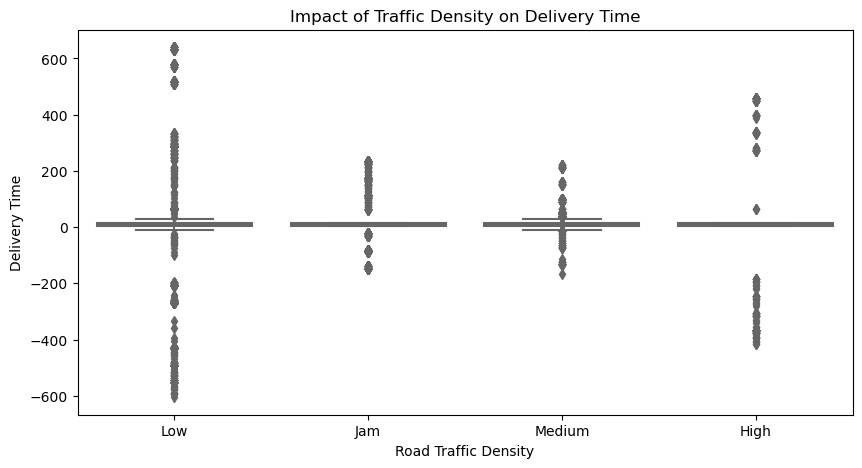

In [24]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Road_traffic_density', y='Delivery_time', data=df, palette='coolwarm')
plt.title('Impact of Traffic Density on Delivery Time')
plt.xlabel('Road Traffic Density')
plt.ylabel('Delivery Time')
plt.show()           

In [25]:
weather_effect = df.groupby('Weather')['Delivery_time'].agg(['mean', 'std', 'count']).reset_index()
weather_effect

,Weather,mean,std,count
0,Cloudy,9.288017,128.025077,1861
1,Fog,14.977376,128.087338,1768
2,Sandstorms,6.669329,122.226703,1878
3,Stormy,13.520155,122.134750,1811
4,Sunny,17.175340,129.801238,2133
5,Windy,11.337269,121.169806,1948


In [26]:
from scipy import stats
groups = [df[df['Weather'] == w]['Delivery_time'].dropna() for w in df['Weather'].unique()]
stats, p_value = stats.f_oneway(*groups)
print(f'ANOVA Test: F-statistic =p-value = {p_value}')
if p_value < 0.05:
    print('Weather conditions significantly impact delivery time')
else:
    print('No significant effect of weather on delivery time')    

ANOVA Test: F-statistic =p-value = 0.1021801248935011
No significant effect of weather on delivery time


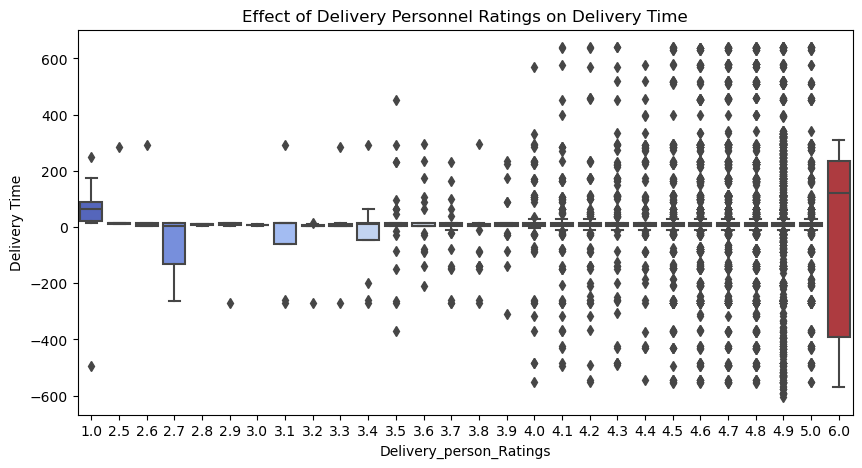

In [27]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Delivery_person_Ratings', y='Delivery_time', data=df, palette='coolwarm')
plt.title('Effect of Delivery Personnel Ratings on Delivery Time')
plt.xlabel('Delivery_person_Ratings')
plt.ylabel('Delivery Time')
plt.show()          

C:\Users\HP\AppData\Local\Temp\ipykernel_7644\2075585800.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Delivery_person_Age', y='Delivery_time', data=df, palette='coolwarm')


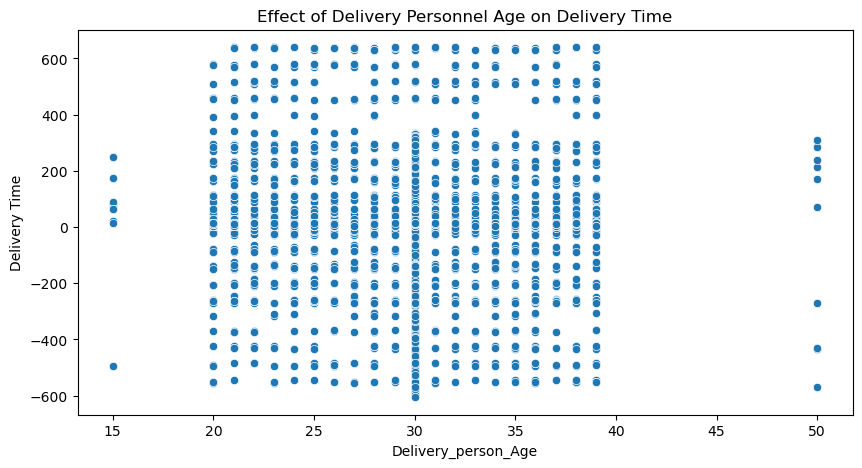

In [28]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Delivery_person_Age', y='Delivery_time', data=df, palette='coolwarm')
plt.title('Effect of Delivery Personnel Age on Delivery Time')
plt.xlabel('Delivery_person_Age')
plt.ylabel('Delivery Time')
plt.show()       

In [29]:
from scipy.stats import pearsonr

In [30]:
corr_age, p_age = pearsonr(df['Delivery_person_Age'], df['Delivery_time'])
print(f'correlation between Age and Delivery time: {corr_age}, p-value: {p_age}')

corr_ratings, p_ratings = pearsonr(df['Delivery_person_Ratings'], df['Delivery_time'])
print(f'correlation between Ratings and Delivery time: {corr_ratings}, p-value: {p_ratings}')

correlation between Age and Delivery time: -0.014356127090262526, p-value: 0.12535999960395697
correlation between Ratings and Delivery time: 0.003108875336831791, p-value: 0.7399746660349451


In [31]:
from scipy import stats

In [32]:
festival_effect = df.groupby('Festival')['Delivery_time'].agg(['mean', 'std', 'count']).reset_index()
festival_effect

,Festival,mean,std,count
0,No,12.073508,126.240159,11196
1,Yes,21.280788,60.573456,203


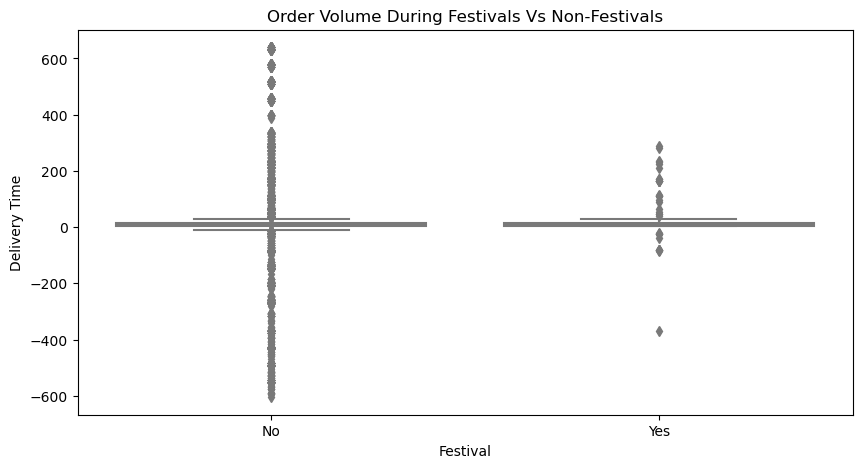

In [33]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Festival', y='Delivery_time', data=df, palette='coolwarm')
plt.title('Order Volume During Festivals Vs Non-Festivals')
plt.xlabel('Festival')
plt.ylabel('Delivery Time')
plt.show()         

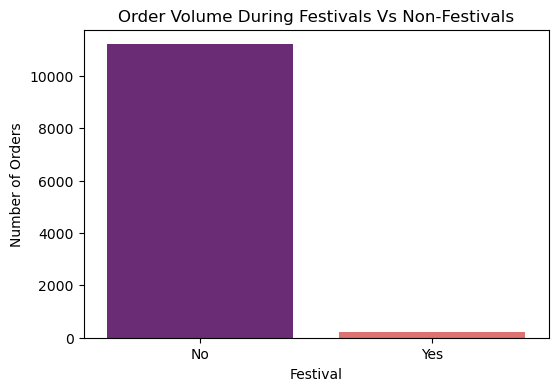

In [34]:
order_counts = df['Festival'].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(x=order_counts.index, y=order_counts.values, palette='magma')
plt.title('Order Volume During Festivals Vs Non-Festivals')
plt.xlabel('Festival')
plt.ylabel('Number of Orders')
plt.show()    

In [35]:
festival_times = df[df['Festival'] == 'Yes']['Delivery_time'].dropna()
non_festival_times = df[df['Festival'] =='No']['Delivery_time'].dropna()

In [36]:
t_stat, p_value = stats.ttest_ind(festival_times, non_festival_times, equal_var=False)
print(f'T-test: t-statistic = {t_stat}, p_value = {p_value}')

T-test: t-statistic = 2.085144376346224, p_value = 0.038135635816006534


In [37]:
if p_value < 0.05:
    print('Significant difference in delivery times during festivals')
else:
    print('No significant difference in delivery times during festivals')

Significant difference in delivery times during festivals


In [38]:
df

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Ordered,Time_Order_picked,Weather,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Delivery_time
0,0x2318,COIMBRES13DEL01,30.0,4.9,11.003669,76.976494,11.043669,77.016494,2022-03-30,18:20:00,15:05:00,Sunny,Low,3,Drinks,electric_scooter,1.0,No,Metropolitian,-195.0
1,0x3474,BANGRES15DEL01,28.0,4.6,12.975377,77.696664,13.085377,77.806664,2022-03-29,20:30:00,20:35:00,Windy,Jam,0,Snack,motorcycle,1.0,No,Metropolitian,5.0
2,0x9420,JAPRES09DEL03,23.0,4.5,26.911378,75.789034,27.001378,75.879034,2022-03-17,19:35:00,19:45:00,Stormy,Jam,0,Drinks,motorcycle,1.0,No,Metropolitian,10.0
3,0x72ee,JAPRES07DEL03,21.0,4.8,26.766536,75.837333,26.856536,75.927333,2022-03-17,17:15:00,17:20:00,Fog,Medium,1,Meal,scooter,1.0,No,Metropolitian,5.0
4,0xa759,CHENRES19DEL01,31.0,4.6,12.986047,80.218114,13.096047,80.328114,2022-03-27,18:25:00,18:40:00,Sunny,Medium,2,Drinks,scooter,1.0,No,Metropolitian,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11394,0x6909,JAPRES01DEL01,35.0,4.6,26.905190,75.810753,27.015190,75.920753,2022-03-27,21:35:00,21:45:00,Sunny,Jam,1,Snack,scooter,1.0,No,Metropolitian,10.0
11395,0x443b,JAPRES11DEL01,33.0,4.9,26.902940,75.793007,26.912940,75.803007,2022-03-17,11:40:00,11:45:00,Sandstorms,High,1,Drinks,scooter,1.0,No,Metropolitian,5.0
11396,0x1ea5,SURRES11DEL03,30.0,4.9,21.157735,72.768778,21.217735,72.828778,2022-03-17,18:20:00,21:05:00,Sunny,Low,3,Drinks,scooter,1.0,No,Metropolitian,165.0
11397,0x22d4,VADRES03DEL02,27.0,4.7,22.320000,73.170000,22.450000,73.300000,2022-03-17,18:35:00,18:40:00,Sandstorms,Medium,0,Meal,motorcycle,0.0,No,Metropolitian,5.0


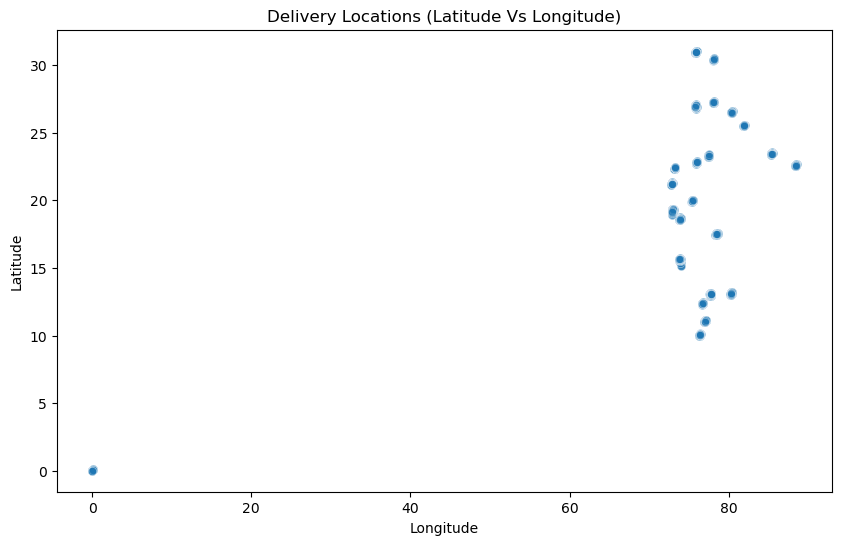

In [39]:
plt.figure(figsize = (10,6))
sns.scatterplot(x=df['Delivery_location_longitude'],y=df['Delivery_location_latitude'], alpha=0.5)
plt.title('Delivery Locations (Latitude Vs Longitude)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [40]:
df

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Ordered,Time_Order_picked,Weather,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Delivery_time
0,0x2318,COIMBRES13DEL01,30.0,4.9,11.003669,76.976494,11.043669,77.016494,2022-03-30,18:20:00,15:05:00,Sunny,Low,3,Drinks,electric_scooter,1.0,No,Metropolitian,-195.0
1,0x3474,BANGRES15DEL01,28.0,4.6,12.975377,77.696664,13.085377,77.806664,2022-03-29,20:30:00,20:35:00,Windy,Jam,0,Snack,motorcycle,1.0,No,Metropolitian,5.0
2,0x9420,JAPRES09DEL03,23.0,4.5,26.911378,75.789034,27.001378,75.879034,2022-03-17,19:35:00,19:45:00,Stormy,Jam,0,Drinks,motorcycle,1.0,No,Metropolitian,10.0
3,0x72ee,JAPRES07DEL03,21.0,4.8,26.766536,75.837333,26.856536,75.927333,2022-03-17,17:15:00,17:20:00,Fog,Medium,1,Meal,scooter,1.0,No,Metropolitian,5.0
4,0xa759,CHENRES19DEL01,31.0,4.6,12.986047,80.218114,13.096047,80.328114,2022-03-27,18:25:00,18:40:00,Sunny,Medium,2,Drinks,scooter,1.0,No,Metropolitian,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11394,0x6909,JAPRES01DEL01,35.0,4.6,26.905190,75.810753,27.015190,75.920753,2022-03-27,21:35:00,21:45:00,Sunny,Jam,1,Snack,scooter,1.0,No,Metropolitian,10.0
11395,0x443b,JAPRES11DEL01,33.0,4.9,26.902940,75.793007,26.912940,75.803007,2022-03-17,11:40:00,11:45:00,Sandstorms,High,1,Drinks,scooter,1.0,No,Metropolitian,5.0
11396,0x1ea5,SURRES11DEL03,30.0,4.9,21.157735,72.768778,21.217735,72.828778,2022-03-17,18:20:00,21:05:00,Sunny,Low,3,Drinks,scooter,1.0,No,Metropolitian,165.0
11397,0x22d4,VADRES03DEL02,27.0,4.7,22.320000,73.170000,22.450000,73.300000,2022-03-17,18:35:00,18:40:00,Sandstorms,Medium,0,Meal,motorcycle,0.0,No,Metropolitian,5.0


In [41]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'], errors='coerce')
df['Time_Ordered'] = pd.to_datetime(df['Time_Ordered'], format = '%H:%M', errors='coerce')
df['Order_Hour'] = df['Time_Ordered'].dt.hour
df['Order_Weekday'] = df['Order_Date'].dt.day_name()
df['Order_Month'] = df['Order_Date'].dt.month

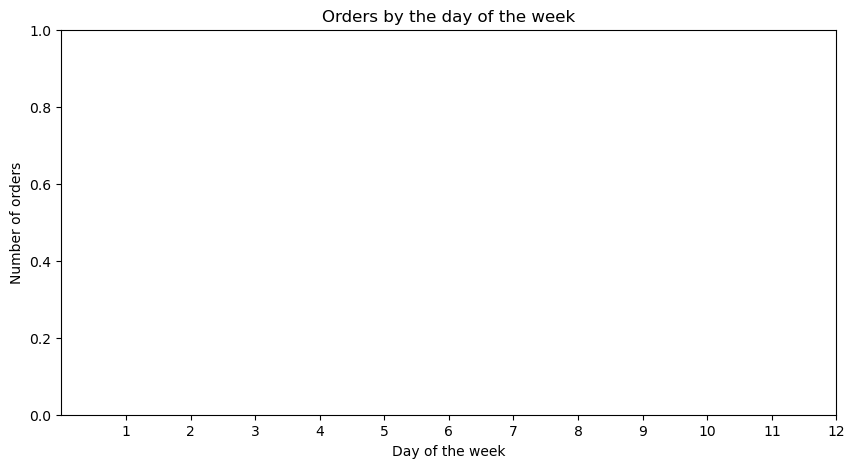

In [42]:
hourly_orders = df['Order_Hour'].value_counts().sort_index()
plt.figure(figsize=(10,5))
sns.lineplot(x=hourly_orders.index, y=hourly_orders.values, marker='o')
plt.title('Orders by the day of the week')
plt.xlabel('Day of the week')
plt.ylabel('Number of orders')
plt.xticks(range(1, 13))
plt.show()

In [43]:
vehicle_effect = df.groupby('Vehicle_condition')['Delivery_time'].agg(['mean', 'std', 'count']).reset_index()
vehicle_effect

,Vehicle_condition,mean,std,count
0,0,13.802798,125.024080,3717
1,1,12.561596,122.181016,3734
2,2,9.857367,122.987780,3821
3,3,28.503937,244.140308,127


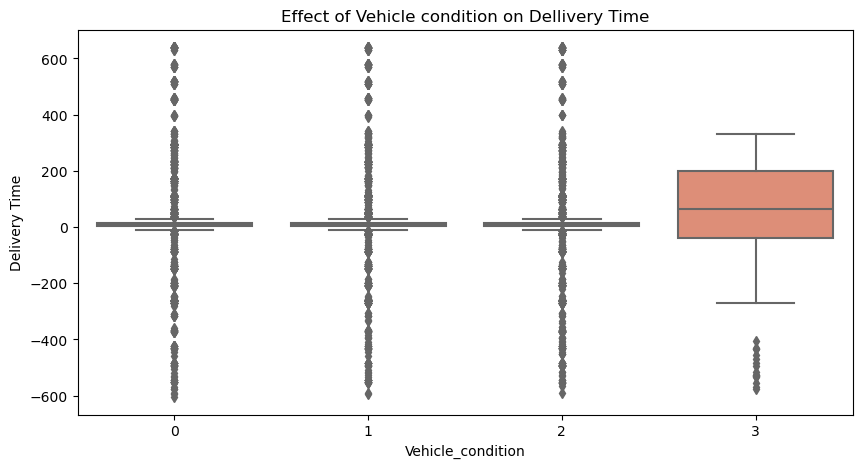

In [44]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Vehicle_condition', y='Delivery_time', data=df, palette='coolwarm')
plt.title('Effect of Vehicle condition on Dellivery Time')
plt.xlabel('Vehicle_condition')
plt.ylabel('Delivery Time')
plt.show()  

In [45]:
vehicle_groups = [df[df['Vehicle_condition'] ==v]['Delivery_time'].dropna() for v in df['Vehicle_condition'].unique()]
anova_stat, p_value = stats.f_oneway(*vehicle_groups)

In [46]:
print(f'ANOVA Test: F-statistic = {anova_stat}, p-value = {p_value}')

ANOVA Test: F-statistic = 1.373171869908393, p-value = 0.24890264786744348


In [47]:
if p_value < 0.05:
    print('vehicle condition significantly impacts delivery time')
else:
    print('No significant impact of vehicle conditions on delivery time')

No significant impact of vehicle conditions on delivery time


In [48]:
from scipy import stats
from sklearn.cluster import DBSCAN

In [49]:
Delivery_features = df[['Delivery_location_longitude', 'Delivery_location_latitude']]

In [50]:
dbscan = DBSCAN(eps=0.01, min_samples=2, metric='euclidean').fit(Delivery_features)

In [51]:
df['Cluster_ID'] = dbscan.labels_

In [52]:
df['Num_Deliveries'] = df.groupby('Cluster_ID')['Cluster_ID'].transform('count')

In [53]:
df.loc[df['Cluster_ID'] == -1, 'Num_Deliveries'] = 1

In [54]:
delivery_effect = df.groupby('Num_Deliveries')['Delivery_time'].agg(['mean','std','count']).reset_index()
delivery_effect

,Num_Deliveries,mean,std,count
0,1,24.453125,119.503952,128
1,2,22.394068,156.729505,236
2,3,20.297030,114.319514,303
3,4,7.079208,145.167427,404
4,5,14.964706,100.339335,425
...,...,...,...,...
65,443,-3.081264,134.586421,443
66,469,16.247335,149.338608,469
67,473,7.737844,118.075847,473
68,632,7.310127,121.580175,632


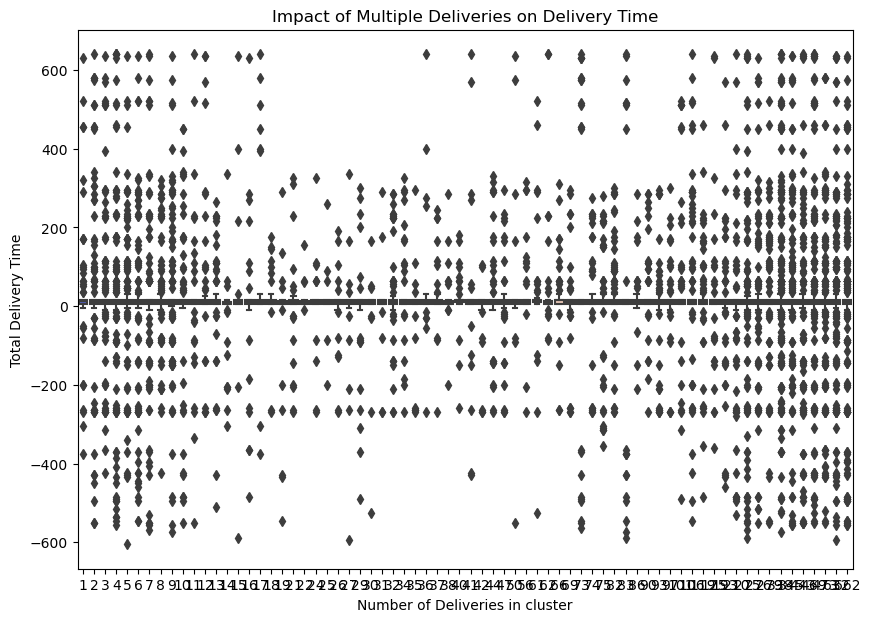

In [65]:
plt.figure(figsize = (10,7))
sns.boxplot(x='Num_Deliveries', y='Delivery_time', data=df, palette='coolwarm')
plt.title('Impact of Multiple Deliveries on Delivery Time')
plt.xlabel('Number of Deliveries in cluster')
plt.ylabel('Total Delivery Time')
plt.show()

In [61]:
single_deliveries = df[df['Num_Deliveries'] == 1]['Delivery_time'].dropna()
multiple_deliveries = df[df['Num_Deliveries'] > 1]['Delivery_time'].dropna()

In [62]:
t_stat, p_value = stats.ttest_ind(single_deliveries, multiple_deliveries, equal_var=False)
print(f'T-test: t-statistic = {t_stat}, p_value = {p_value}')

T-test: t-statistic = 1.1623670087712192, p_value = 0.24721263083456266


In [63]:
if p_value < 0.05:
    print('Handling multiple deliveries significantly increases total delivery time')
else:
    print('No significant impact of multiple deliveries on total delivery time')

No significant impact of multiple deliveries on total delivery time
